In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table

WORLD_SIZE = 5

A_POS = [0,1]
A_PRIME_POS = [4,1]
B_POS = [0,3]
B_PRIME_POS = [2,3]
DISCOUNT = 0.9

ACTIONS = [np.array([0,-1]),
           np.array([-1,0]),
           np.array([0,1]),
           np.array([1,0])]
ACTION_PROB = 0.25

def step(state,action):
    if state == A_POS:
        return A_PRIME_POS,10
    if state == B_POS:
        return B_PRIME_POS,5
    next_state = (np.array(state)+action).tolist()
    x,y = next_state
    if x < 0 or x >= WORLD_SIZE or \
            y < 0 or y >= WORLD_SIZE:
        reward = -1.0
        next_state = state
    else:
        reward = 0
    return next_state, reward

def draw_image(image):
    fig,ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax,bbox=[0,0,1,1])

    nrows,ncols = image.shape
    width,height = 1.0/ncols,1.0/nrows

    for (i,j), val in np.ndenumerate(image):
        tb.add_cell(i,j,width,height,text=val,
                    loc='center',facecolor='white')

    for i in range(len(image)):
        tb.add_cell(i,-1,width,height,text=i+1,loc='right',
                    edgecolor='none',facecolor='none')
        tb.add_cell(-1,i,width,height/2,text=i+1,loc='center',
                    edgecolor='none',facecolor='none')
    ax.add_table(tb)

In [18]:
def results():
    value= np.zeros((WORLD_SIZE,WORLD_SIZE))
    while True:
        new_value = np.zeros_like(value)
        for i in range(WORLD_SIZE):
            for j in range(WORLD_SIZE):
                for action in ACTIONS:
                    (next_i,next_J),reward = step([i,j],action)
                    new_value[i,j] += ACTION_PROB*(reward+DISCOUNT*value[next_i,next_J])

        if np.sum(np.abs(value-new_value)) < 1e-4:
            draw_image(np.round(new_value,decimals=2))
            plt.show()
            break
        value = new_value

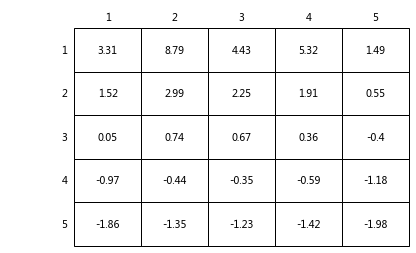

In [19]:
results()